In [1]:
from astropy.io import fits
from ics.cobraCharmer import pfiDesign
import sep
import numpy as np
import matplotlib.pyplot as plt
import moduleAnalyze
import pathlib

In [2]:
#xml = '/Users/cwen/MNT_AGC2/xml/spare2_new.xml'
#xml = '/Volumes/GoogleDrive/My Drive/CobraData/20190610/spare2_phiOptim_20190610.xml'
xml = pathlib.Path('/data/MCS/20191120_006/output/SC02_phi_250.xml')
brokens = []
camSplit = 28

In [ ]:
ana = moduleAnalyze.moduleAnalyze(xml, brokens, camSplit)

In [ ]:
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190625/20190625phiv1'
ana.convertXML('spare1_convert.xml', dataPath)

In [ ]:
#dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190610/'
#dataPath = '/Volumes/GoogleDrive/My Drive/COBRA/ASRD/190516/phi/003/'
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190625/20190625phiv1'
#ana.makePhiMotorMap('spare2_0015.xml', dataPath, steps=50, phiOnTime=0.015)
ana.makePhiMotorMap('spare1_wen.xml', dataPath, repeat=1, steps=250, fast=False, phiOnTime=0.03)

In [ ]:
#dataPath = '/Volumes/GoogleDrive/My Drive/COBRA/ASRD/190516/theta/003/'
dataPath = '/Volumes/GoogleDrive/My Drive/CobraData/20190618/20190618/0020/'
ana.makeThetaMotorMap('spare2_wen.xml', dataPath, steps=200, thetaOnTime=0.02)

In [ ]:
dataPath = '/home/pfs/Documents/cwen/ics_cobraCharmer/xml/'
phiPath = '/data/MCS/20191120_006/data/'
thetaPath = '/data/MCS/20191121_005/data/'
ana.calculateGeometry('SC02_02.xml', dataPath, thetaPath, phiPath)

In [4]:
sf = []
sr = []
tf = []
tr = []

for n in range(20):
    path = f'/data/MCS/20191203_{n+9:03d}/'
    sf.append(np.load(path + 'data/thetaSpeedFW.npy'))
    sr.append(np.load(path + 'data/thetaSpeedRV.npy'))
    xml = pathlib.Path(path + 'output/SC02_theta_search.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd1)
    tr.append(model.motorOntimeSlowRev1)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

/home/pfs/Documents/cwen/ics_cobraCharmer/python/ics/cobraCharmer/pfiDesign.py:54: UserWarning: please use PFIDesign.loadModule() or PFIDesign.loadPFI()
  warnings.warn('please use PFIDesign.loadModule() or PFIDesign.loadPFI()')


In [ ]:
sf = []
sr = []
tf = []
tr = []

for n in range(14):
    path = f'/data/MCS/20191202_{n+41:03d}/'
    sf.append(np.load(path + 'data/phiSpeedFW.npy'))
    sr.append(np.load(path + 'data/phiSpeedRV.npy'))
    xml = pathlib.Path(path + 'output/SC02_phi_search4.xml')
    model = pfiDesign.PFIDesign(xml)
    tf.append(model.motorOntimeSlowFwd2)
    tr.append(model.motorOntimeSlowRev2)

sf = np.array(sf)
sr = np.array(sr)
tf = np.array(tf)
tr = np.array(tr)

In [5]:
tf

array([[0.07      , 0.07      , 0.07      , ..., 0.07      , 0.07      ,
        0.07      ],
       [0.04205646, 0.03585704, 0.03665004, ..., 0.04634423, 0.03625748,
        0.03775276],
       [0.04687248, 0.03712439, 0.03732027, ..., 0.04669352, 0.03618842,
        0.03381018],
       ...,
       [0.04311295, 0.03584675, 0.03720463, ..., 0.04449614, 0.03172167,
        0.02676052],
       [0.04529857, 0.03580701, 0.03620916, ..., 0.04580223, 0.03337489,
        0.02678243],
       [0.04660511, 0.03689393, 0.03726659, ..., 0.04327251, 0.0339475 ,
        0.02726573]])

In [6]:
spd = np.deg2rad(0.06)
ontimeF = np.empty(57)
ontimeR = np.empty(57)

for c in range(57):
    s = sf[1:-1,c]
    t = tf[1:-1,c]

    t0 = np.min(t)
    t1 = np.max(t)
    s0 = np.min(s)
    s1 = np.max(s)

    ontimeF[c] = t0 + (t1-t0)/(s1-s0)*(spd-s0)

for c in range(57):
    s = sr[1:-1,c]
    t = tr[1:-1,c]

    t0 = np.min(t)
    t1 = np.max(t)
    s0 = np.min(s)
    s1 = np.max(s)

    ontimeR[c] = t0 + (t1-t0)/(s1-s0)*(spd-s0)

print(ontimeF, ontimeR)

[0.04660511 0.03689393 0.03726659 0.03758411 0.02825772 0.03495773
 0.02961954 0.0334864  0.03563147 0.03686879 0.03580955 0.0421772
 0.03952808 0.0422098  0.04059764 0.03133669 0.05715775 0.03158746
 0.06374628 0.03763933 0.03188707 0.04191716 0.04618066 0.03545483
 0.03432297 0.04923922 0.03595863 0.0301635  0.03453441 0.03896631
 0.06641207 0.03737526 0.04092131 0.04923185 0.0350841  0.03628183
 0.04999766 0.04806912 0.03553059 0.03445573 0.0343808  0.04557889
 0.03560929 0.03859271 0.03504741 0.03628554 0.03583047 0.03634356
 0.04163444 0.0252966  0.04301366 0.02438872 0.03176968 0.04746728
 0.04327251 0.0339475  0.02726573] [0.04379398 0.03356771 0.03796017 0.03651042 0.02979668 0.0366512
 0.03104666 0.03452016 0.03482166 0.03723297 0.0352203  0.0409225
 0.04225492 0.04297585 0.04022853 0.03384775 0.04395456 0.03461732
 0.0392133  0.0493731  0.03082445 0.0434655  0.05505234 0.04311884
 0.03563234 0.04266765 0.03149444 0.03325637 0.03587509 0.03788762
 0.0540146  0.03430125 0.04025

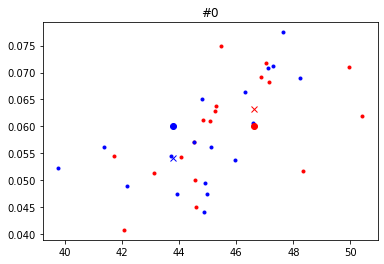

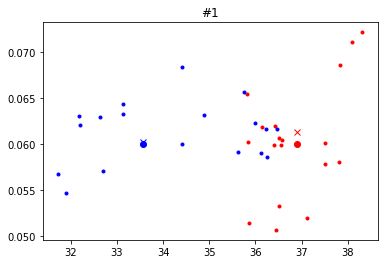

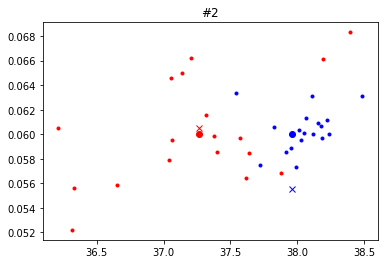

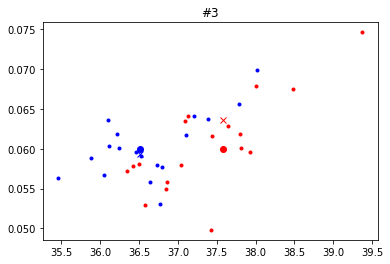

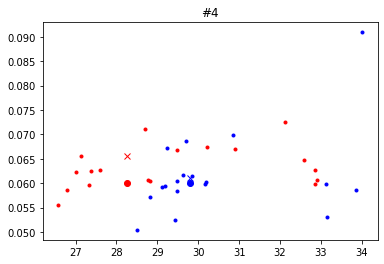

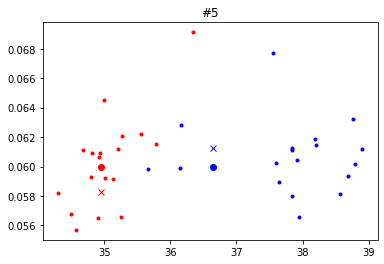

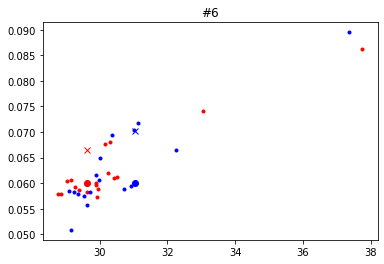

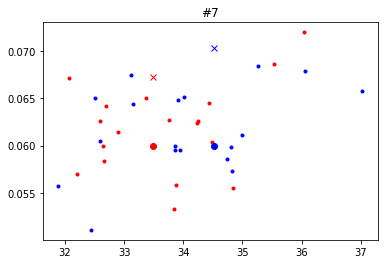

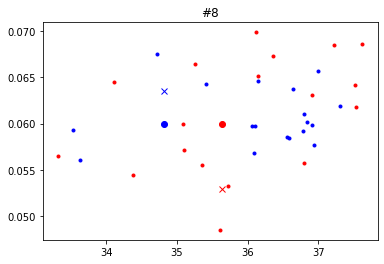

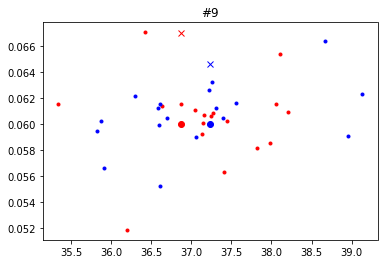

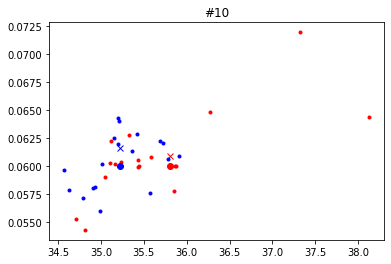

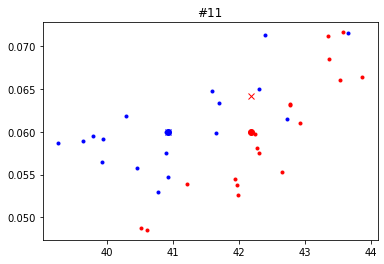

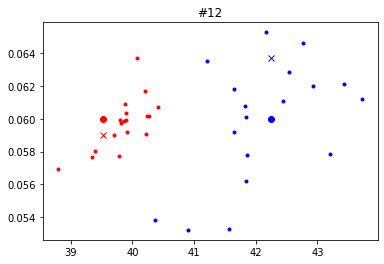

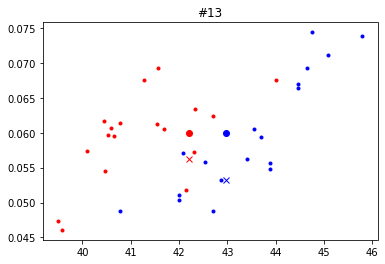

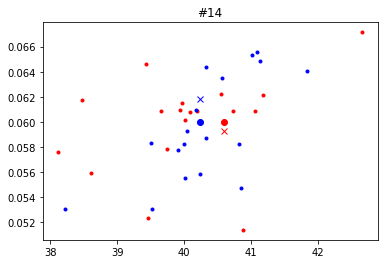

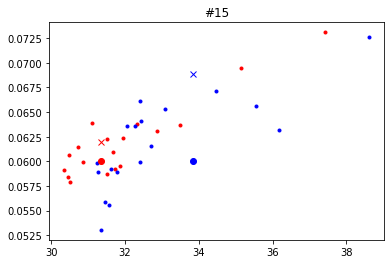

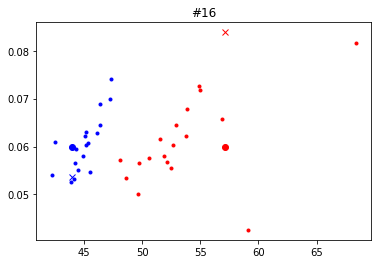

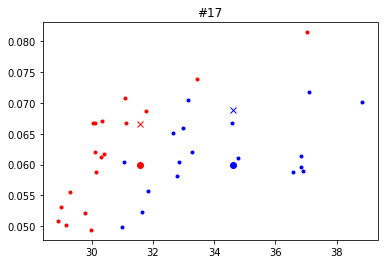

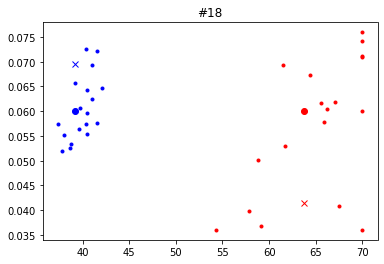

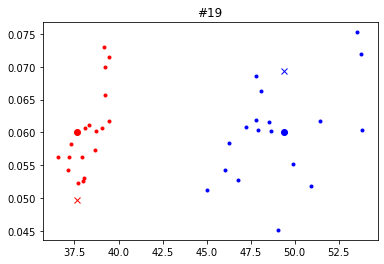

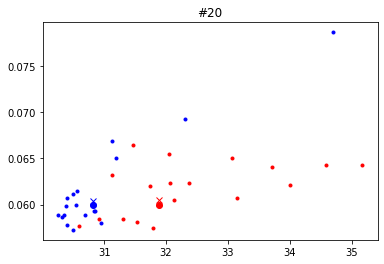

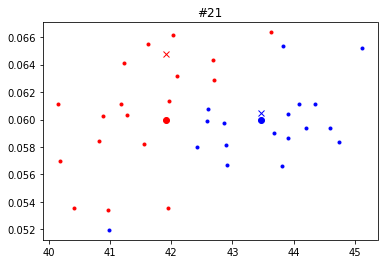

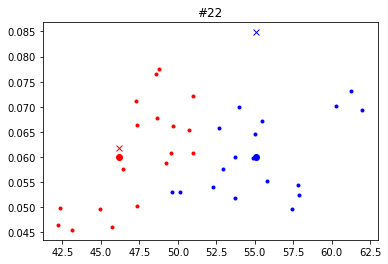

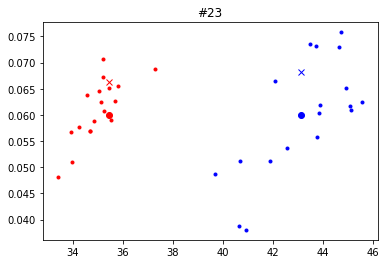

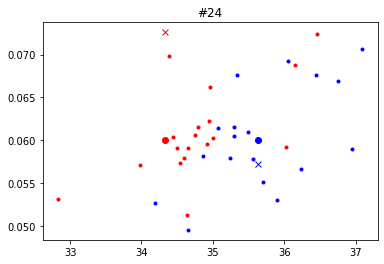

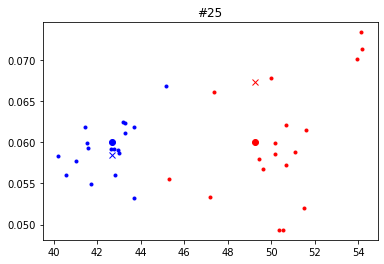

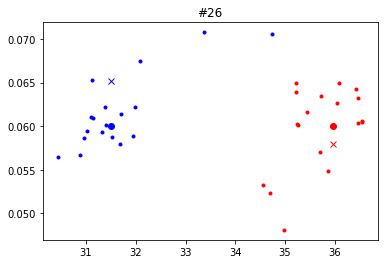

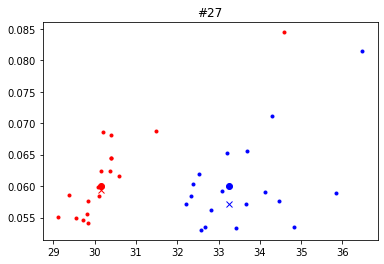

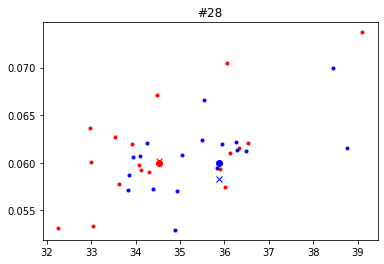

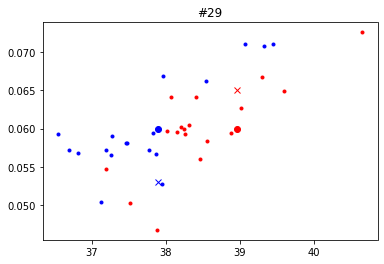

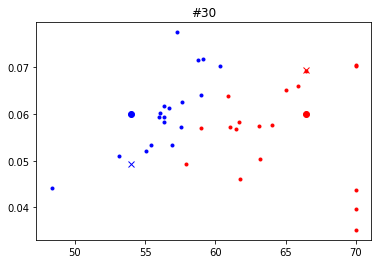

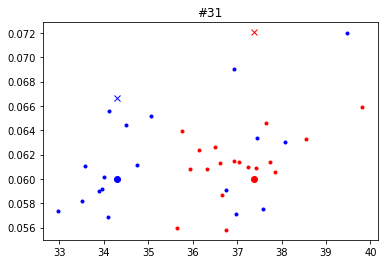

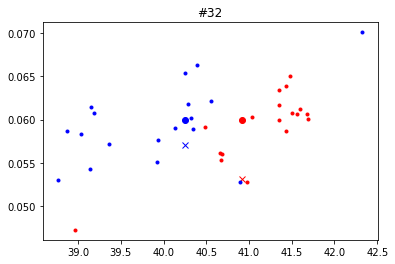

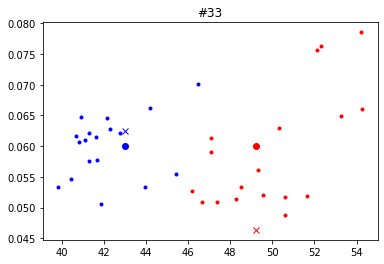

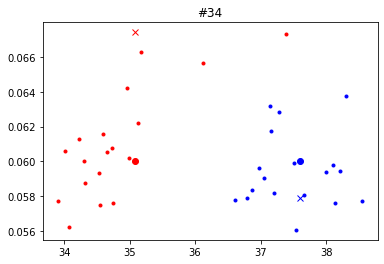

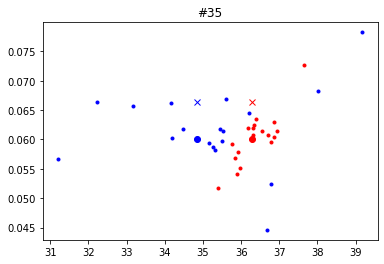

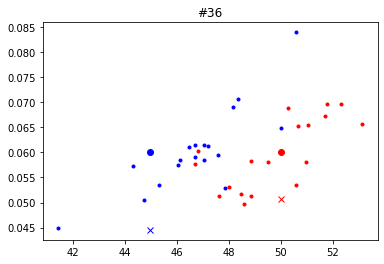

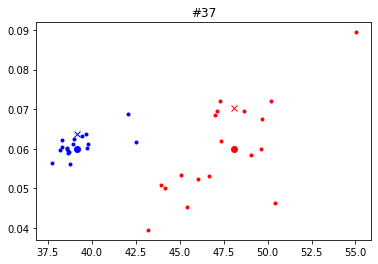

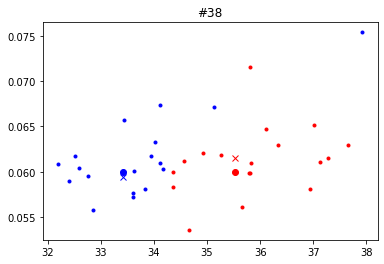

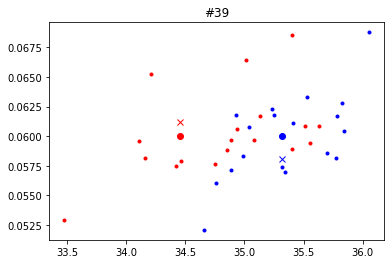

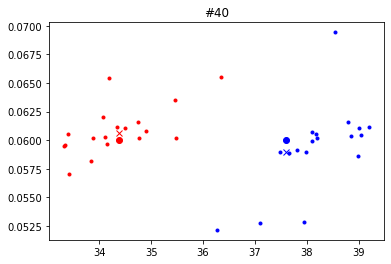

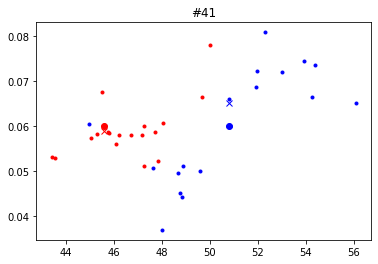

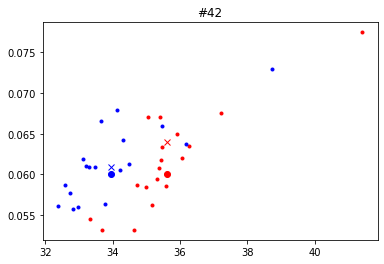

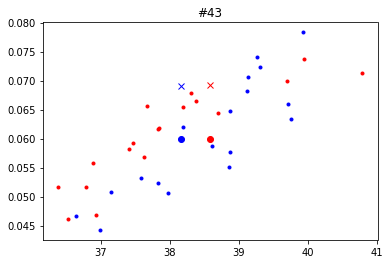

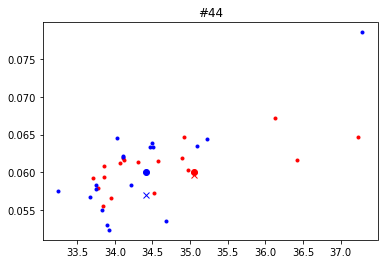

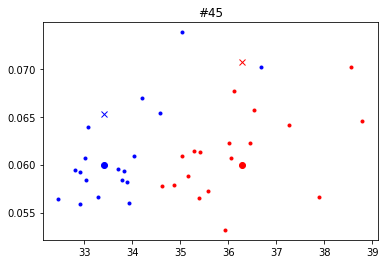

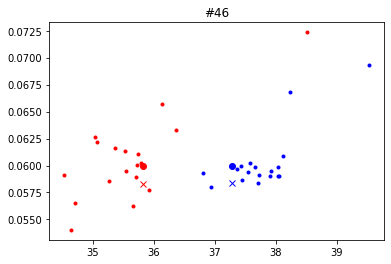

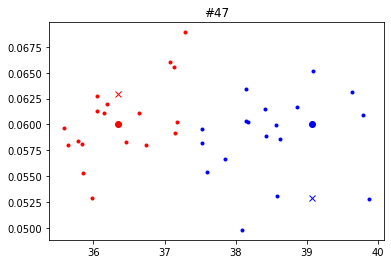

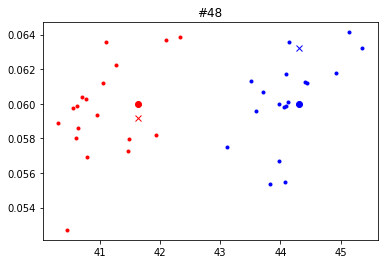

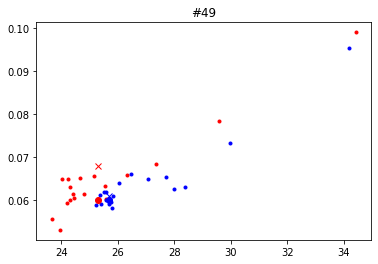

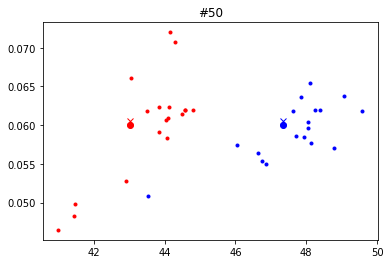

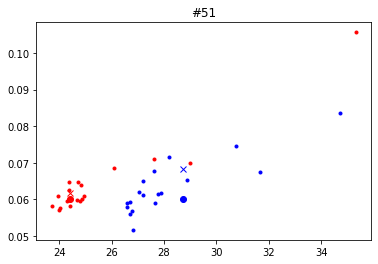

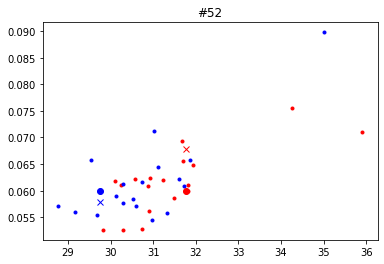

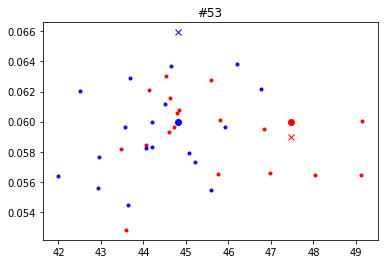

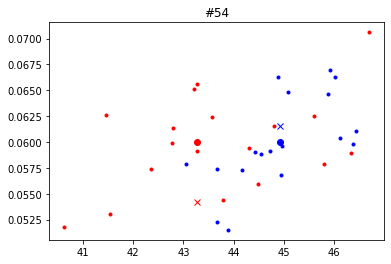

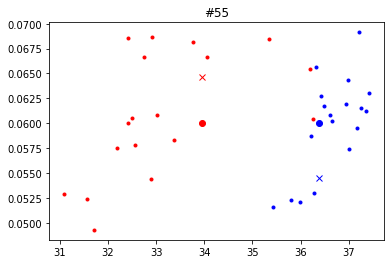

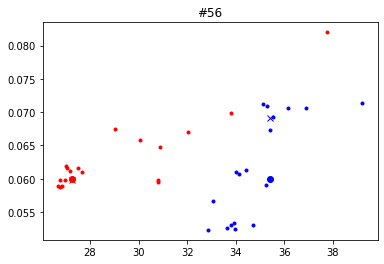

In [7]:
for c in range(57):
    ax = plt.gca()
    ax.set_title(f'#{c}')
    plt.plot(tf[-1,c]*1000, np.rad2deg(sf[-1,c]), 'rx')
    plt.plot(tr[-1,c]*1000, np.rad2deg(sr[-1,c]), 'bx')
    plt.plot(tf[1:-1,c]*1000, np.rad2deg(sf[1:-1,c]), 'r.')
    plt.plot(tr[1:-1,c]*1000, np.rad2deg(sr[1:-1,c]), 'b.')
    plt.plot(ontimeF[c]*1000, np.rad2deg(spd), 'ro')
    plt.plot(ontimeR[c]*1000, np.rad2deg(spd), 'bo')
    plt.show()

In [ ]:
tf, tr

In [ ]:
tf[1:-1,0]